In [1]:

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Загрузка данных
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

data = data.drop(columns=['deck', 'embark_town', 'alive', 'who','class'])

# Заполнение пропущенных значений для числовых столбцов
numeric_features = ['age', 'fare']
numeric_imputer = SimpleImputer(strategy='most_frequent')
data[numeric_features] = numeric_imputer.fit_transform(data[numeric_features])

# Заполнение пропущенных значений для категориальных столбцов
categorical_features = ['embarked']
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_features] = categorical_imputer.fit_transform(data[categorical_features])

In [3]:
data = pd.get_dummies(data, columns=['sex', 'embarked'], drop_first=True)
data.head()

,survived,pclass,age,sibsp,parch,fare,class,adult_male,alone,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,Third,True,False,True,False,True
1,1,1,38.0,1,0,71.2833,First,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,Third,False,True,False,False,True
3,1,1,35.0,1,0,53.1000,First,False,False,False,False,True
4,0,3,35.0,0,0,8.0500,Third,True,True,True,False,True


In [5]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


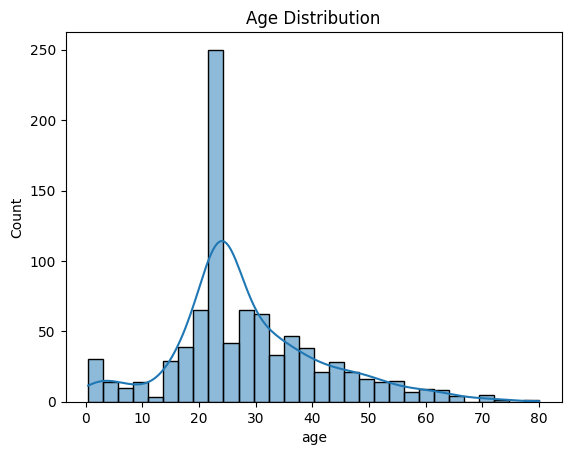

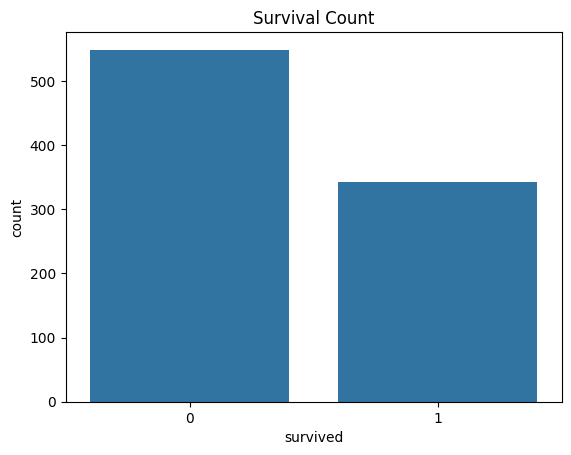

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

sns.countplot(x='survived', data=data)
plt.title('Survival Count')
plt.show()

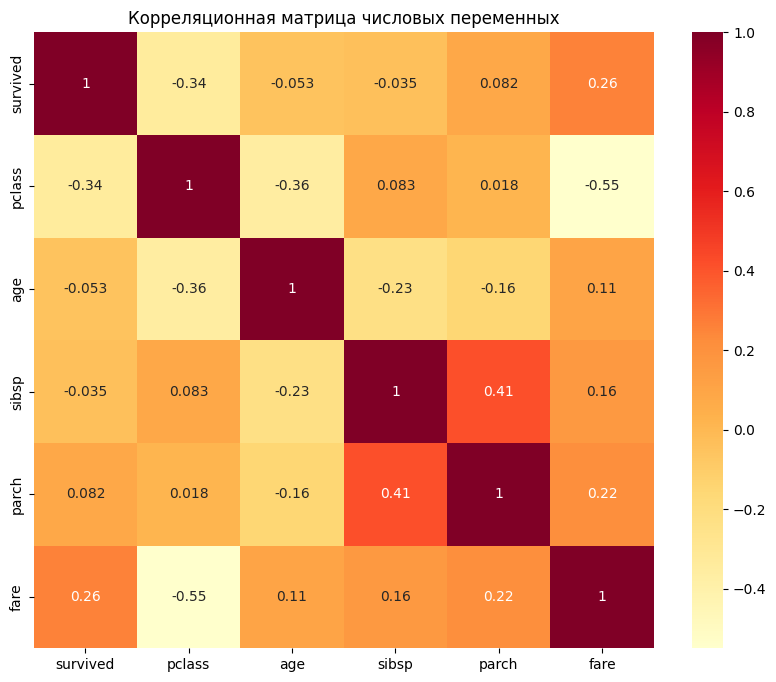

In [9]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = data[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title("Корреляционная матрица числовых переменных")
plt.show()

In [11]:
X = data.drop('survived', axis=1)
y = data['survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')

Accuracy: 0.7877
Precision: 0.7966
Recall: 0.6438
F1-Score: 0.7121
ROC-AUC: 0.8247


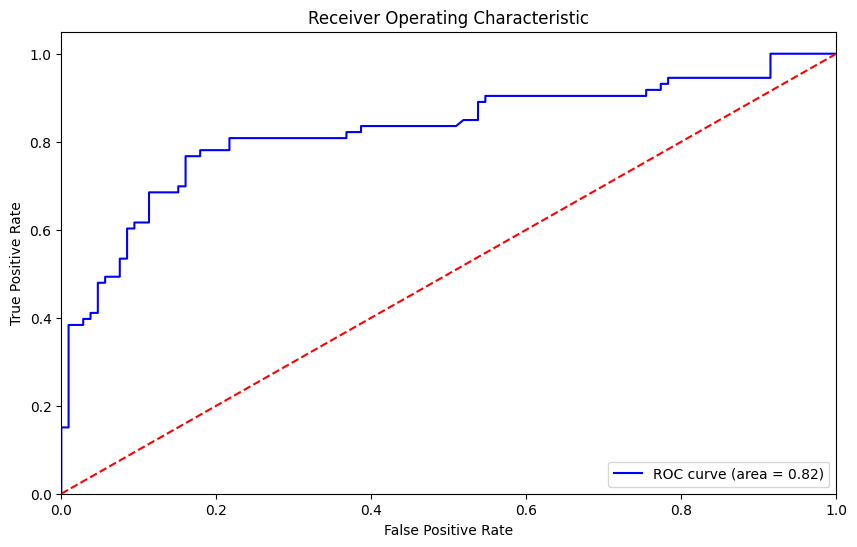

In [13]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(X_train, y_train)

# Оценка качества модели
dt_y_pred = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_precision = precision_score(y_test, dt_y_pred)
dt_recall = recall_score(y_test, dt_y_pred)
dt_f1 = f1_score(y_test, dt_y_pred)

print(f'Decision Tree - Accuracy: {dt_accuracy:.4f}')
print(f'Decision Tree - Precision: {dt_precision:.4f}')
print(f'Decision Tree - Recall: {dt_recall:.4f}')
print(f'Decision Tree - F1-Score: {dt_f1:.4f}')

Decision Tree - Accuracy: 0.7486
Decision Tree - Precision: 0.7333
Decision Tree - Recall: 0.6027
Decision Tree - F1-Score: 0.6617


In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Оценка качества модели
rf_y_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)

print(f'Random Forest - Accuracy: {rf_accuracy:.4f}')
print(f'Random Forest - Precision: {rf_precision:.4f}')
print(f'Random Forest - Recall: {rf_recall:.4f}')
print(f'Random Forest - F1-Score: {rf_f1:.4f}')

Random Forest - Accuracy: 0.7877
Random Forest - Precision: 0.7966
Random Forest - Recall: 0.6438
Random Forest - F1-Score: 0.7121


In [16]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy, dt_accuracy, rf_accuracy],
    'Precision': [precision, dt_precision, rf_precision],
    'Recall': [recall, dt_recall, rf_recall],
    'F1 Score': [f1, dt_f1, rf_f1]
})

print(results)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.787709   0.796610  0.643836  0.712121
1        Decision Tree  0.748603   0.733333  0.602740  0.661654
2        Random Forest  0.782123   0.793103  0.630137  0.702290


In [ ]:
#Выводы
#ввиду небольшого числа параметров в датасете и наличия явной кореляции с некоторыми из них логистическая регрессия показала хороший результат
#Дерево решений: Легко интерпретировать, но может переобучаться на небольших выборках. тут у нас небольшая выборка и оно показало худший результат
#Случайный лес показал результат на уровне логистической регрессии и ожидаемо превзошел дерево решений